# Global Projection

## in Cartopy

In [1]:
import cartopy.crs as crs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt

### PlateCarree

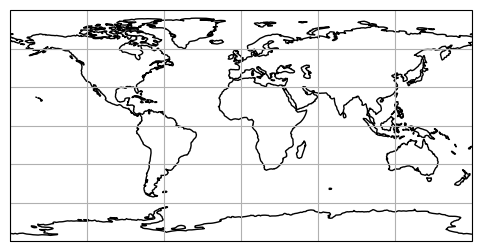

In [2]:
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=crs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines()
plt.show()

### more Global Projections

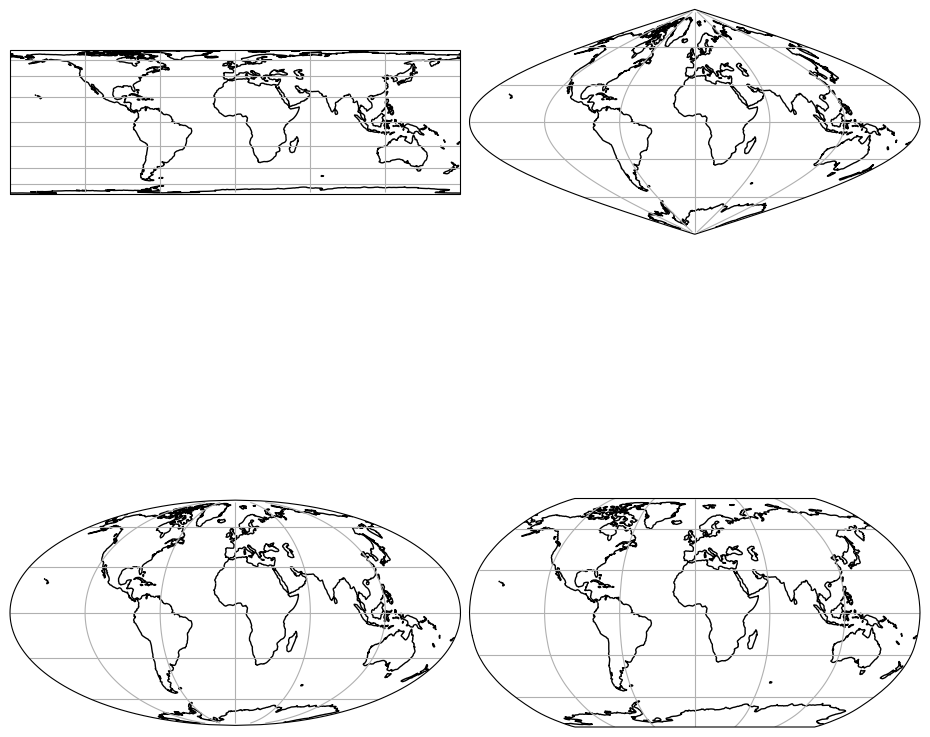

In [3]:
fig = plt.figure(figsize=[10, 10])
ax1 = fig.add_subplot(2, 2, 1, projection=crs.LambertCylindrical(central_longitude=0.0))
ax2 = fig.add_subplot(2, 2, 2, projection=crs.Sinusoidal())
ax3 = fig.add_subplot(2, 2, 3, projection=crs.Mollweide())
ax4 = fig.add_subplot(2, 2, 4, projection=crs.Robinson())

fig.subplots_adjust(bottom=0.05, top=0.95,left=0.04, right=0.95, wspace=0.02)

ax1.coastlines(resolution='110m')
ax1.gridlines()

ax2.coastlines(resolution='110m')
ax2.gridlines()

ax3.coastlines(resolution='110m')
ax3.gridlines()

ax4.coastlines(resolution='110m')
ax4.gridlines()

plt.show()

## Nort and South Pol

In [4]:
import numpy as np
import matplotlib.path as mpath

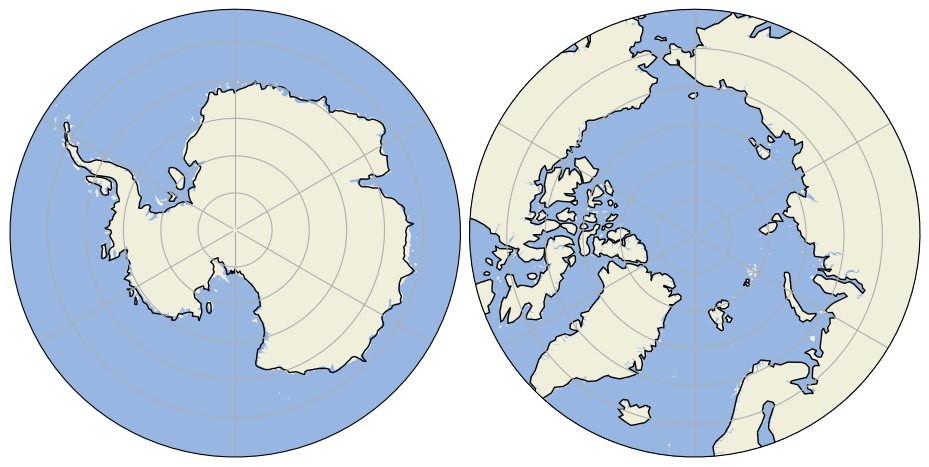

In [5]:
fig = plt.figure(figsize=[10, 10])
ax1 = fig.add_subplot(1, 2, 1, projection=crs.SouthPolarStereo())
ax2 = fig.add_subplot(1, 2, 2, projection=crs.NorthPolarStereo())

fig.subplots_adjust(bottom=0.05, top=0.95,left=0.04, right=0.95, wspace=0.02)

ax1.set_extent([-180, 180, -90, -60], crs.PlateCarree())
ax2.set_extent([-180, 180, 90, 60], crs.PlateCarree())

ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)

ax2.add_feature(cfeature.OCEAN)
ax2.add_feature(cfeature.LAND)

ax1.gridlines()
ax2.gridlines()

ax1.coastlines(resolution='110m')
ax2.coastlines(resolution='110m')


# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax1.set_boundary(circle, transform=ax1.transAxes)
ax2.set_boundary(circle, transform=ax2.transAxes)

plt.show()

## Europ Projection

### EuroPP

class cartopy.crs.EuroPP
UTM Zone 32 projection for EuroPP domain.

Ellipsoid is International 1924, Datum is ED50.

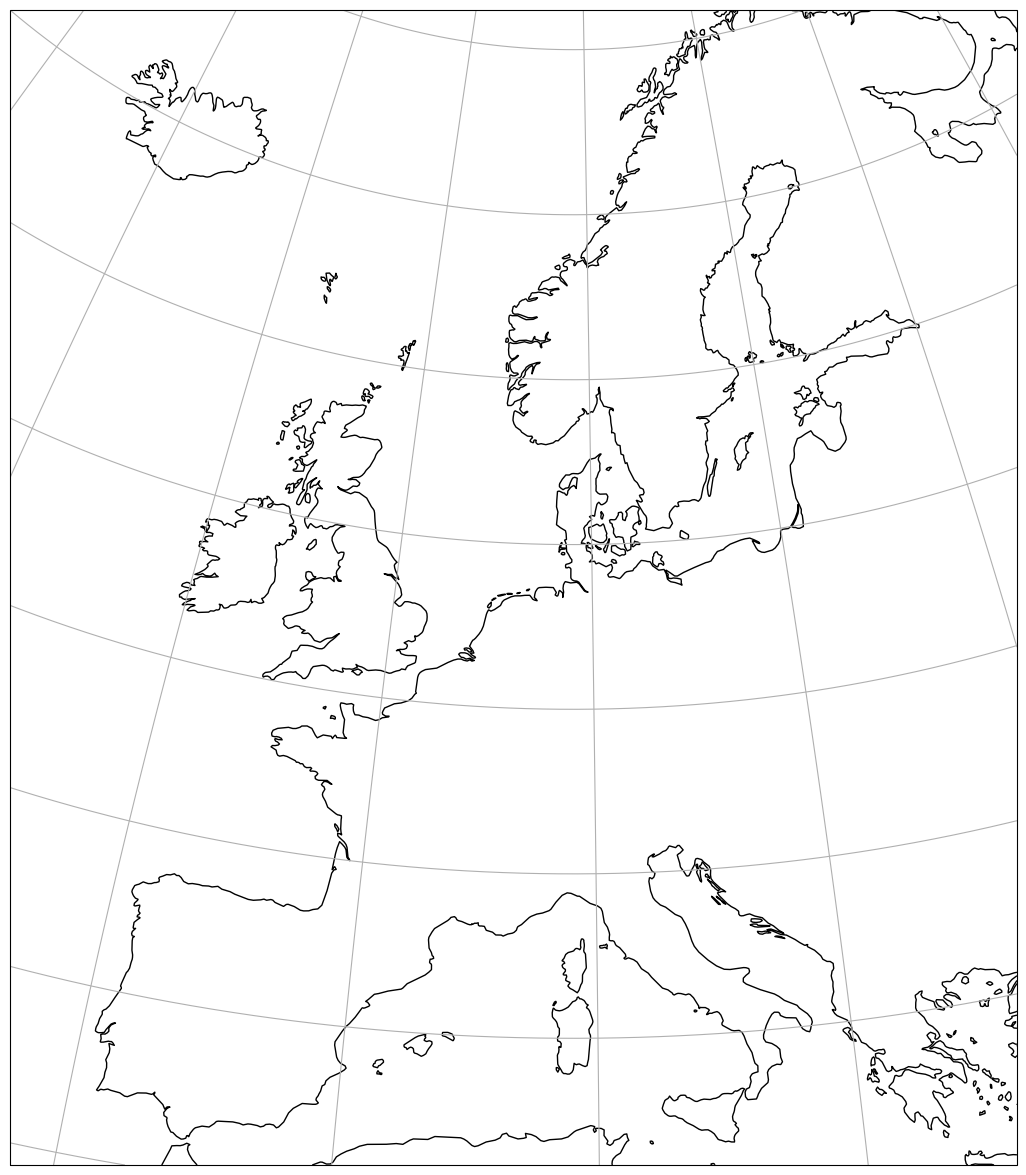

In [6]:
factor=5
plt.figure(figsize=(2.61538461538*factor, 3*factor))
ax = plt.axes(projection=crs.EuroPP())
ax.coastlines(resolution='50m')
ax.gridlines()
plt.show()

## Mercator

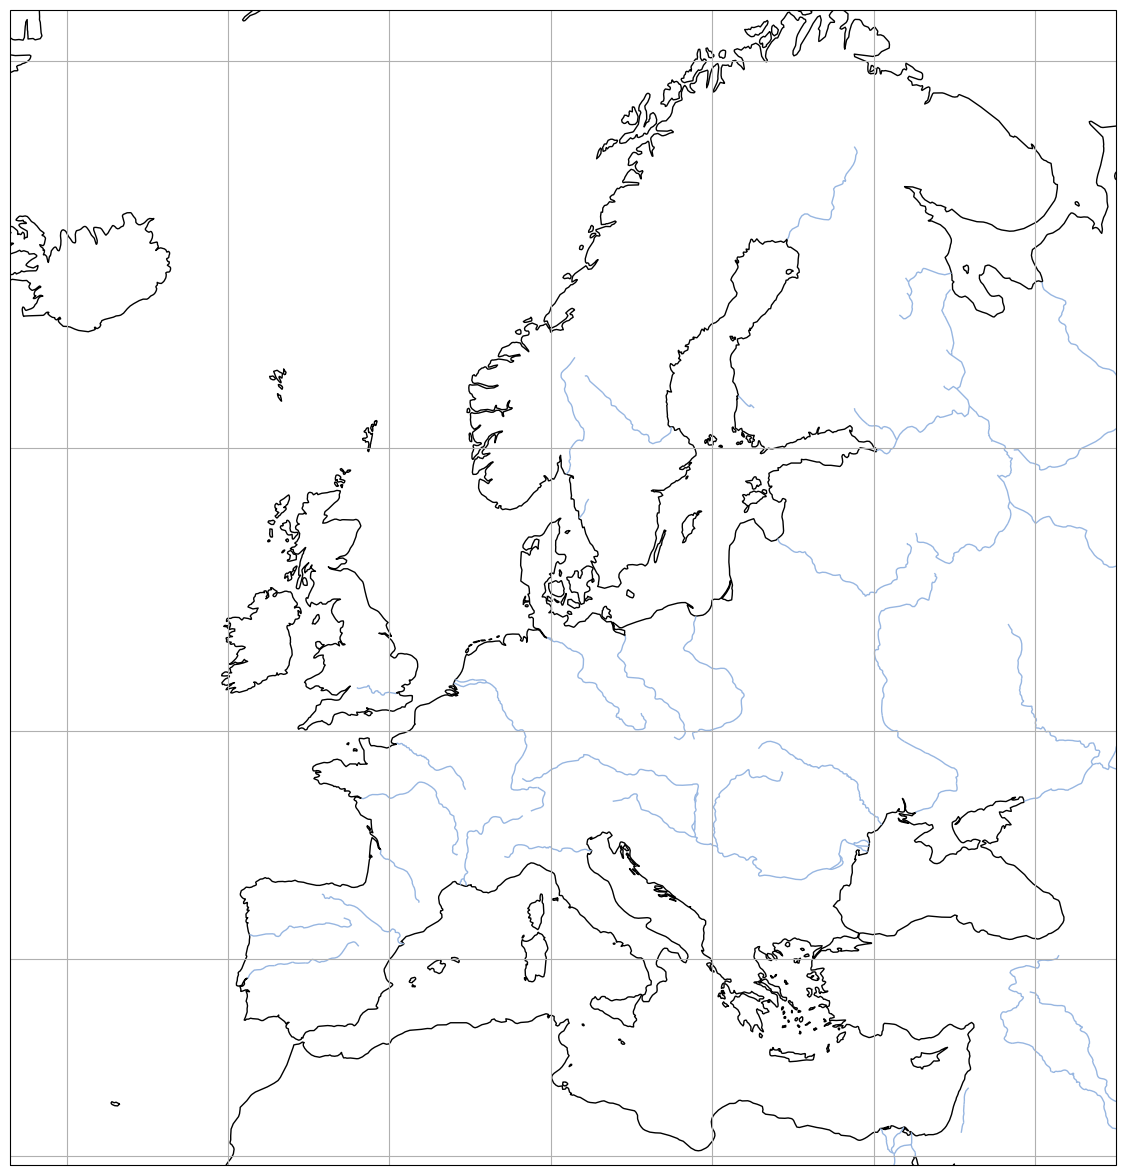

In [7]:
plt.figure(figsize=(3.5091*factor, 3*factor))
ax = plt.axes(projection=crs.Mercator())
#ax.stock_img()
ax.coastlines(resolution='50m')
ax.set_extent([-23.5, 45.0, 29.5, 67.5])
ax.gridlines()
ax.add_feature(cfeature.RIVERS)
plt.show()

### How to add Natural Earth Feature to you plot?

Function: 
class cartopy.feature.NaturalEarthFeature(category, name, scale, **kwargs)

Link: https://www.naturalearthdata.com/downloads/

More help: https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html

In [8]:
states_provinces = cfeature.NaturalEarthFeature(category='cultural',
                                                name='admin_0_boundary_lines_land',
                                                scale='50m',facecolor='none')
#https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_boundary_lines_land.zip

In [9]:
river_lake = cfeature.NaturalEarthFeature(category='physical',
                                                name='rivers_lake_centerlines',
                                                scale='50m',facecolor='none')
#https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/physical/ne_50m_rivers_lake_centerlines.zip

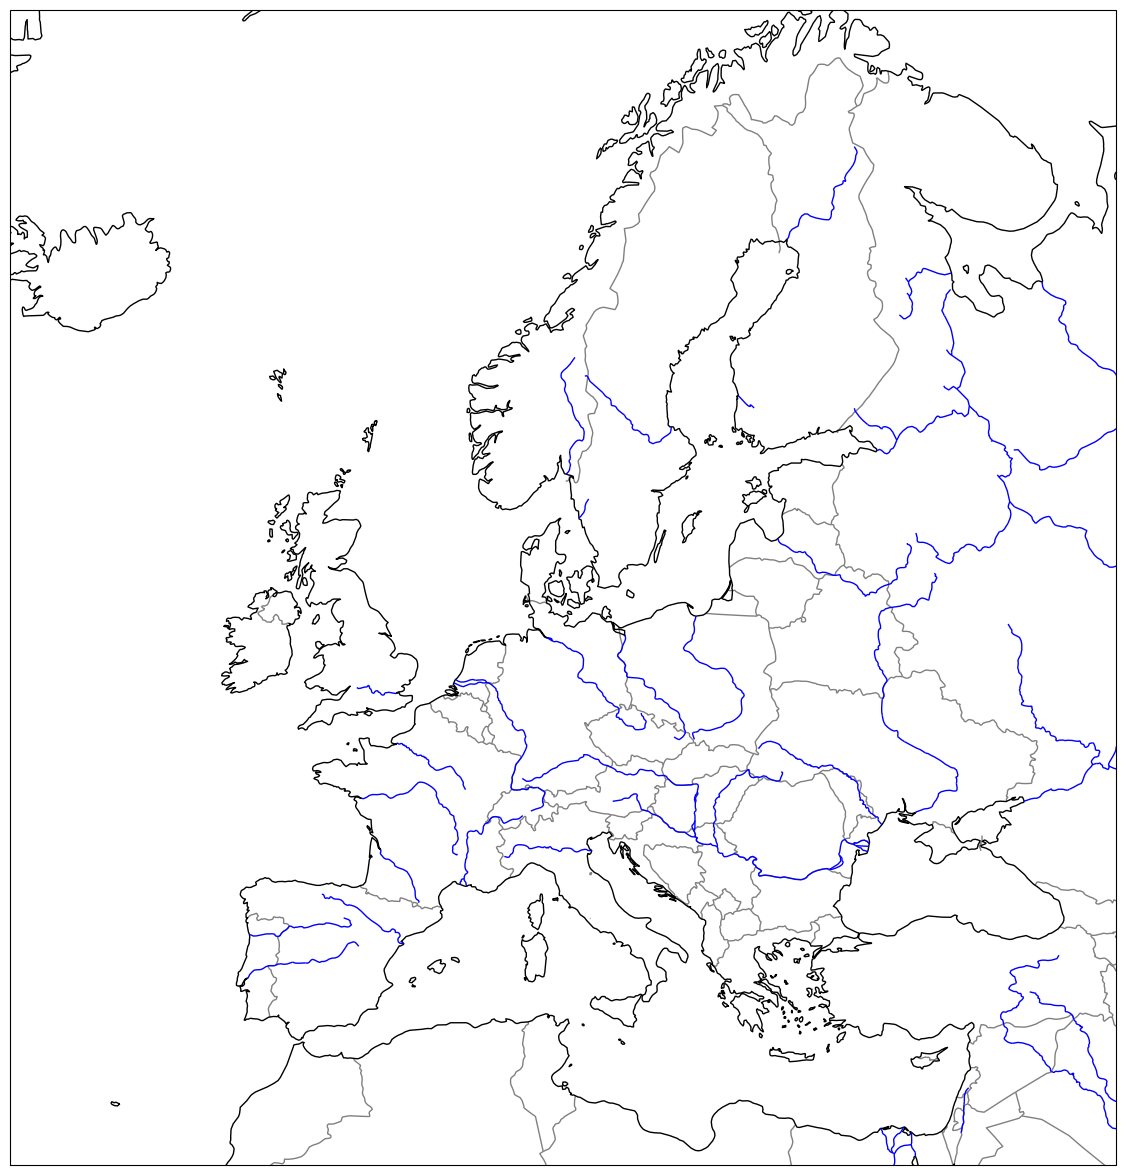

In [10]:
plt.figure(figsize=(3.5091*factor, 3*factor))
ax = plt.axes(projection=crs.Mercator())
ax.coastlines(resolution='50m')
ax.set_extent([-23.5, 45.0, 29.5, 67.5])
ax.add_feature(river_lake,edgecolor='blue',zorder=2)
ax.add_feature(states_provinces,edgecolor='gray',zorder=1)
plt.show()